In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:

file1_path = '/content/drive/MyDrive/Colab Notebooks/fomc 회의록 분석/24.01.04 fomc 회의록.txt'


with open(file1_path, 'r', encoding='utf-8') as file1:
    content1 = file1.read()


print(f"파일 1 내용:\n{content1}\n")

파일 1 내용:
Minutes of the Federal Open Market Committee
December 12–13, 2023

A joint meeting of the Federal Open Market Committee and the Board of Governors of the Federal Reserve System was held in the offices of the Board of Governors on Tuesday, December 12, 2023, at 10:30 a.m. and continued on Wednesday, December 13, 2023, at 9:00 a.m.1

Attendance
Jerome H. Powell, Chair
John C. Williams, Vice Chair
Michael S. Barr
Michelle W. Bowman
Lisa D. Cook
Austan D. Goolsbee
Patrick Harker
Philip N. Jefferson
Neel Kashkari
Adriana D. Kugler
Lorie K. Logan
Christopher J. Waller

Thomas I. Barkin, Raphael W. Bostic, Mary C. Daly, and Loretta J. Mester, Alternate Members of the Committee

Susan M. Collins and Jeffrey R. Schmid, Presidents of the Federal Reserve Banks of Boston and Kansas City, respectively

Kathleen O'Neill Paese, Interim President of the Federal Reserve Bank of St. Louis

Joshua Gallin, Secretary
Matthew M. Luecke, Deputy Secretary
Brian J. Bonis, Assistant Secretary
Michelle 

In [3]:
#영문을 분석하기 위해 nltk모듈을 사용하였습니다.

import nltk

nltk.download('punkt')                          #토큰화
nltk.download('stopwords')                      #불용어 제거
nltk.download('averaged_perceptron_tagger')     #품사 태깅
nltk.download('wordnet')                        #표제어 추출

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#우선 기자회견 전 파월의 연설 내용을 전처리 합니다.

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


file_path = '/content/drive/MyDrive/Colab Notebooks/fomc 회의록 분석/24.01.04 fomc 회의록.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

#토큰화
tokens = word_tokenize(text)

# 불용어 제거 및 철자가 2글자 이하인 단어 제외. 대문자로 시작하는 단어 제거.
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words and len(word) > 2and not word[0].isupper()]

# 품사 태깅
pos_tags = pos_tag(filtered_tokens)

# WordNet 품사 태그 변환 함수
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # 기본적으로 명사로 처리하도록 변경

# 표제어 추출(단어의 기본형으로 변환해서 불필요한 단어의 수를 줄이고 과거형, 진행형 이런거를 통일 합니다.)
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(pos)) for word, pos in pos_tags]

# 명사 추출(명사만 추출합니다. 동사, 형용사 등등 필요없는 품사는 뺍니다.)
nouns = [word for word, pos in pos_tags if pos.startswith('N')]

print(nouns)
print(lemmatized_words)


['meeting', 'offices', 'manager', 'review', 'developments', 'markets', 'period', 'conditions', 'interest', 'rates', 'equity', 'prices', 'depreciation', 'dollar', 'rise', 'equity', 'prices', 'yields', 'earnings', 'growth', 'consensus', 'expectations', 'volatility', 'equities', 'conditions', 'tightening', 'summer', 'securities', 'period', 'investors', 'incoming', 'data', 'risks', 'inflation', 'pressures', 'addition', 'market', 'participants', 'communications', 'participants', 'view', 'policy', 'rate', 'period', 'market', 'communications', 'issuance', 'securities', 'maturities', 'decline', 'yields', 'securities', 'period', 'reduction', 'term', 'premiums', 'expectations', 'policy', 'rate', 'inflation', 'derivatives', 'period', 'investors', 'outlook', 'inflation', 'manager', 'expectations', 'policy', 'view', 'level', 'funds', 'rate', 'cycle', 'path', 'surveys', 'reduction', 'policy', 'rate', 'surveys', 'policy', 'rate', 'market', 'pricing', 'period', 'developments', 'money', 'markets', 'ope

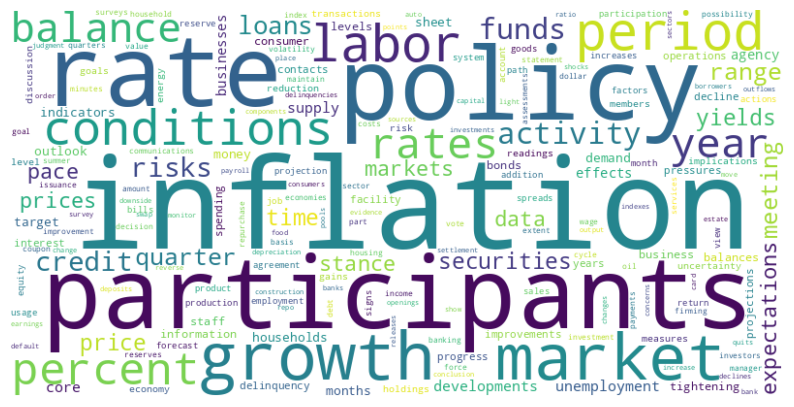

In [5]:
#토큰의 빈도수를 워드클라우드로 표현 합니다.

import matplotlib.pyplot as plt
from wordcloud import WordCloud


# 빈도
freq_dist = FreqDist(nouns)

# 워드클라우드
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

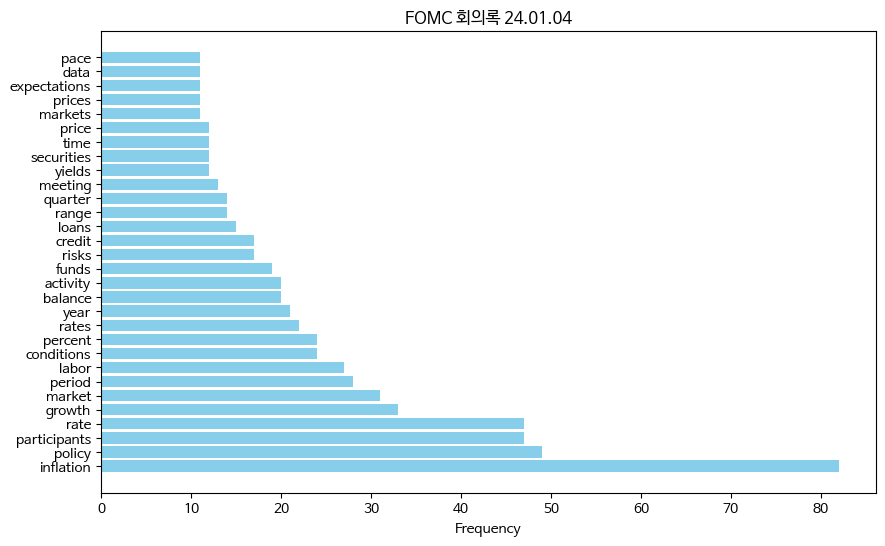

In [6]:
# 가로 막대 그래프 시각화 (높은 순서대로)
sorted_freq_dist = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.barh([item[0] for item in sorted_freq_dist[:30]], [item[1] for item in sorted_freq_dist[:30]], color='skyblue')
plt.xlabel('Frequency')
plt.title('FOMC 회의록 24.01.04')
plt.show()


In [7]:
!pip install summa

In [8]:
#summa를 활용하여 회의록 전체를 요약한 내용 입니다.
#토큰화는 주제가 되는 단어, 핵심 단어를 보기 위함이고 회의록이 말하고자 하는 문맥의 흐름은 파악이 어렵기 때문에
#요약이 필요하다고 생각됩니다.

from summa import summarizer


file_path = '/content/drive/MyDrive/Colab Notebooks/fomc 회의록 분석/24.01.04 fomc 회의록.txt'


with open(file_path, 'r', encoding='utf-8') as file:
    meeting_text = file.read()

summary = summarizer.summarize(meeting_text, ratio=0.2)

print(summary)


A joint meeting of the Federal Open Market Committee and the Board of Governors of the Federal Reserve System was held in the offices of the Board of Governors on Tuesday, December 12, 2023, at 10:30 a.m. and continued on Wednesday, December 13, 2023, at 9:00 a.m.1
David Bowman, Senior Associate Director, Division of Monetary Affairs, Board
Jeffrey D.
Yields on nominal Treasury securities declined sharply over the intermeeting period—more so at longer maturities—after having increased notably during the previous intermeeting period, as investors appeared to interpret incoming data as reducing risks of prolonged inflation pressures.
In addition, market participants interpreted communications from FOMC participants as solidifying the view that the Committee's policy rate may be at its peak.
Respondents to the Open Market Desk's Survey of Primary Dealers and Survey of Market Participants largely converged around the view that the peak level of the federal funds rate for this tightening cy

###요약

회의 일정 및 경제 개황:
2023년 12월 12일과 13일에 개최된 연방공개시장위원회(FOMC) 및 연방준비제도이사회 합동회의.
정책금리의 최고조에 도달했을 가능성이 제기되었고, 시장 참가자들은 연방기금금리의 피크 수준에 수렴했다는 견해를 보였다.

경기 및 물가 동향:
정책금리 피크에 대한 시장 기대와 더불어, 해외 중앙은행들의 긴축적 통화정책 영향으로 외국 경제 활동에 부담이 있었다.
노동 시장의 불균형이 완화되면서 임금 상승이 둔화되었고, 물가 상승률은 목표치에 못 미치는 수준으로 낮아졌다.

금융 시장 및 통화정책 전망:
시장 참가자들은 정책금리에 대한 전망을 낮추며 국채 수익률이 하락했다.
미국 내 신용시장에서 대부분의 기업, 가계 및 지방정부의 차입 비용은 하락했지만 여전히 높은 수준이었다.
물가 및 경제 활동에 대한 위험에 대한 경계를 유지하면서 정책금리를 현 수준에서 유지하기로 결정되었다.

참가자의 전망 및 의견:
참가자들은 물가 압력이 누그러지고 경제 활동이 둔화될 때까지 현 수준의 금융조건을 유지하는 것이 중요하다고 판단했다.
물가 및 경제 활동에 대한 상승 리스크가 감소했지만 여전히 목표치를 상회하는 물가에 대한 우려가 남아 있었다.
연준은 자산 보유를 축소하는 과정이 순조롭게 진행되고 있으며 이에 따라 조달 시장에서의 사용이 줄어들고 있다고 밝혔다.
이러한 내용이 FOMC 및 연방준비제도이사회 회의에서 다뤄진 핵심 내용입니다.

###나의 생각

현 수준의 금리를 유지하지만 물가 상승 리스크가 존재해서 앞으로 두고 보겠다가 핵심 내용인 것 같습니다. 금리는 이 정도로 당분간 유지 할 것 같습니다.

유로달러 선물시장은 거의 달러에 의해 영향을 많이 받습니다. 달러의 움직임을 결정하는 중요한 요소중 하나인 금리는 당분간 동결 할 것이다 라고 생각하고 다른 요소에 의한 경제의 움직임에 대해 알아 볼 필요가 있다고 생각합니다.

현재 미국은 너무 강력하지만 부채가 너무 많고 달러가 많이 풀려 있다는 점이 걸립니다. 그리고 유로달러 선물차트를 보면 코로나와 전쟁이 잠잠 해졌음에도 달러의 가격이 여전히 너무 높습니다.

미국이 너무나 강력해서 강달러가 유지가 되어질지, 특별한 이슈, 위기가 없어서 원래 가격으로 돌아갈지 궁금해 집니다.

제 생각에는 차트 흐름상 원래의 자리로 돌아가는게 맞는 것 같습니다. 1월2일 부터 1월5일 24년 첫 주에 달러가 갑자기 상승했는데 이유가 딱히 없습니다. 달러가 제 자리로 돌아가기 위한 흔들림은 계속 될 것이고 추세는 달러가 하락하는 쪽으로 흘러갈 것이다 라고 생각됩니다.